# Посмотрим статистику датасета 


Необходима дополнительная обработка представленных csv файлов 

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tqdm import tqdm_notebook as tqdm

____

In [2]:
%%script false
cafe_1 = pd.read_csv('/content/dish_metadata_cafe1.csv', 
                     usecols=range(6), 
                     header=None)

cafe_2 = pd.read_fwf('/content/dish_metadata_cafe2.csv', header=None)
cafe_2 = cafe_2[0].str.split(',', expand=True)

count = 0
for i in range(6, 146):
    count += 1
    if count != 6:
        cafe_2 = cafe_2.drop([i], axis=1)
    if count == 7:
        count = 0

cafe_2.columns = list(range(0, 26))
cafe_2 = cafe_2.fillna(0.0)

for i in range(1, 26):
    cafe_2[i] = cafe_2[i].astype('float')

for_nump = cafe_2.iloc[:,6:26].to_numpy().astype(np.float32)
cafe_2[4] = list(for_nump.sum(axis=1))
cafe_2 = cafe_2.iloc[:, 0:6]

full_df = pd.concat([cafe_1,cafe_2], axis=0, ignore_index=True)
full_df.columns = ['dish_id', 'total_calories', 'total_mass', 'total_fat', 'total_carb', 'total_protein']
full_df.to_csv('full.csv')

dict_with_carbs = {}
for i in range(len(full_df['dish_id'])):
    dict_with_carbs[str(full_df['dish_id'][i])] = float(full_df['total_carb'][i])
with open('dict_with_carbs.json', 'w') as fp:
    json.dump(dict_with_carbs, fp)

Couldn't find program: 'false'


____

In [6]:
full_df = pd.read_csv("C:\\Users\\Yulia\\Desktop\\diploma\\nutrition5k_dataset\\metadata\\full.csv", index_col=0)

In [7]:
full_df

,dish_id,total_calories,total_mass,total_fat,total_carb,total_protein
0,dish_1561662216,300.794281,193.0,12.387489,28.218290,18.633970
1,dish_1562688426,137.569992,88.0,8.256000,5.190000,10.297000
2,dish_1561662054,419.438782,292.0,23.838249,26.351543,25.910593
3,dish_1562008979,382.936646,290.0,22.224644,10.173570,35.345387
4,dish_1560455030,20.590000,103.0,0.148000,4.625000,0.956000
...,...,...,...,...,...,...
5001,dish_1571934465,0.000000,232.0,0.000000,18.559999,0.000000
5002,dish_1573073666,0.000000,15.0,0.000000,1.157313,0.000000
5003,dish_1575924356,0.000000,103.0,0.000000,25.544001,0.000000
5004,dish_1574359199,0.000000,329.0,0.000000,39.015999,0.000000


In [8]:
pd.DataFrame(full_df['total_carb'].describe())

,total_carb
count,5006.000000
mean,17.761351
std,28.617809
min,0.000000
25%,5.093155
50%,12.646952
75%,24.200001
max,844.568604


In [14]:
def show_plot(data_):
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.distplot(data_, ax=ax[0])
    sns.scatterplot(data=data_, ax=ax[1])

C:\Users\Yulia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


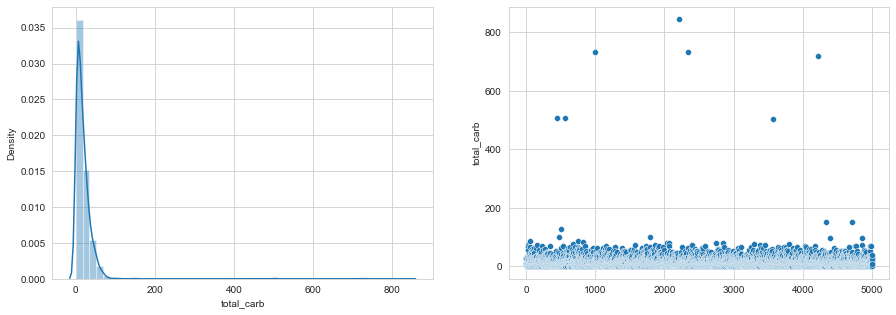

In [10]:
show_plot(full_df['total_carb'])

Необходимо удалить из эксперимента "выбросы"

In [11]:
full_df_without_error = full_df[full_df['total_carb'] <= 200]

In [12]:
full_df_without_error = full_df_without_error.reset_index(drop=True)
full_df_without_error

,dish_id,total_calories,total_mass,total_fat,total_carb,total_protein
0,dish_1561662216,300.794281,193.0,12.387489,28.218290,18.633970
1,dish_1562688426,137.569992,88.0,8.256000,5.190000,10.297000
2,dish_1561662054,419.438782,292.0,23.838249,26.351543,25.910593
3,dish_1562008979,382.936646,290.0,22.224644,10.173570,35.345387
4,dish_1560455030,20.590000,103.0,0.148000,4.625000,0.956000
...,...,...,...,...,...,...
4994,dish_1571934465,0.000000,232.0,0.000000,18.559999,0.000000
4995,dish_1573073666,0.000000,15.0,0.000000,1.157313,0.000000
4996,dish_1575924356,0.000000,103.0,0.000000,25.544001,0.000000
4997,dish_1574359199,0.000000,329.0,0.000000,39.015999,0.000000


C:\Users\Yulia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


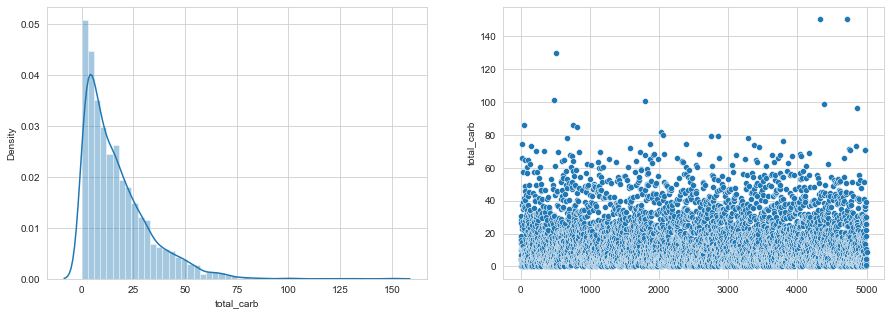

In [13]:
show_plot(full_df_without_error['total_carb'])

In [11]:
# dict_with_carbs_clean = {}
# for i in range(len(full_df_without_error['dish_id'])):
#     dict_with_carbs_clean[str(full_df_without_error['dish_id'][i])] = float(full_df_without_error['total_carb'][i])
# with open('nutrition5k_dataset/metadata/dict_with_carbs_clean.json', 'w') as fp:
#     json.dump(dict_with_carbs_clean, fp)

In [12]:
pd.DataFrame(full_df_without_error['total_carb'].describe())

,total_carb
count,4999.000000
mean,16.877771
std,15.422174
min,0.000000
25%,5.088120
50%,12.592723
75%,24.172720
max,150.316010


In [13]:
def read_txt(path):
    return pd.read_csv(path, header=None, names=['dish_ID'])

In [14]:
data_id_test = read_txt('nutrition5k_dataset/dish_ids/splits/rgb_test_ids.txt')
data_id_train = read_txt('nutrition5k_dataset/dish_ids/splits/rgb_train_ids.txt')
data_id_depth_test = read_txt('nutrition5k_dataset/dish_ids/splits/depth_test_ids.txt')
data_id_depth_train = read_txt('nutrition5k_dataset/dish_ids/splits/depth_train_ids.txt')


In [15]:
print(f'''number of dishes in data_id_test: {len(data_id_test)}
number of dishes in data_id_train: {len(data_id_train)}
total: {len(data_id_test) + len(data_id_train)}
number of dishes in data_id_depth_test: {len(data_id_depth_test)}
number of dishes in data_id_depth_train: {len(data_id_depth_train)}
total: {len(data_id_depth_test) + len(data_id_depth_train)}
''')


number of dishes in data_id_test: 709
number of dishes in data_id_train: 4059
total: 4768
number of dishes in data_id_depth_test: 507
number of dishes in data_id_depth_train: 2758
total: 3265



In [16]:
def count_number_files(file_path):
    initial_count = 0
    for path in os.listdir(file_path):
        if os.path.isfile(os.path.join(file_path, path)):
            initial_count += 1
    return initial_count

def total_number_for_split(type_of_split):
    total_count = 0
    count_for_folder = []
    id_with_one_rgb = []
    for i in tqdm(type_of_split['dish_ID']):
        try:
            curr_count = count_number_files('nutrition5k_dataset/imagery/side_angles/' + str(i))   
        except:
            curr_count = 1
            id_with_one_rgb.append(i)
        count_for_folder.append(curr_count)
        total_count += curr_count
    return total_count, count_for_folder, id_with_one_rgb
    

In [17]:
n_img_data_id_test, count_for_folder_test, id_with_one_rgb_test = total_number_for_split(data_id_test)
n_img_data_id_train, count_for_folder_train, id_with_one_rgb_train = total_number_for_split(data_id_train)

C:\Users\Yulia\AppData\Local\Temp\ipykernel_7076\826064919.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(type_of_split['dish_ID']):


  0%|          | 0/709 [00:00<?, ?it/s]

  0%|          | 0/4059 [00:00<?, ?it/s]

In [18]:
names = ['data_id_test',
         'data_id_test with 1 rgb',
        'data_id_train',
         'data_id_train with 1 rgb',
        'total',
        'data_id_depth_test',
        'data_id_depth_train']
values = [n_img_data_id_test,
          len(id_with_one_rgb_test),
         n_img_data_id_train,
         len(id_with_one_rgb_train),
         n_img_data_id_test + n_img_data_id_train,
         len(data_id_depth_test),
         len(data_id_depth_train)]

In [19]:
final_stat = pd.DataFrame({'Number of images in': names, 'Value': values })

In [20]:
final_stat

,Number of images in,Value
0,data_id_test,18440
1,data_id_test with 1 rgb,33
2,data_id_train,112142
3,data_id_train with 1 rgb,129
4,total,130582
5,data_id_depth_test,507
6,data_id_depth_train,2758


In [2]:
path_train = "C:\\Users\\Yulia\\Desktop\\Carbohydrate-counting\\images\\train"
path_test = "C:\\Users\\Yulia\\Desktop\\Carbohydrate-counting\\images\\test"
path_json_test = "C:\\Users\\Yulia\\Desktop\\Carbohydrate-counting\\working_with_dataset\\json_test.json"
path_json_train = "C:\\Users\\Yulia\\Desktop\\Carbohydrate-counting\\working_with_dataset\\json_train.json"

In [3]:
with open(path_json_train) as json_file:
    data_train = json.load(json_file)
    
with open(path_json_test) as json_file:
    data_test = json.load(json_file)

In [8]:
len(data_train)

111772

In [9]:
len(data_test)

18294

In [4]:
data_test

{'dish_1561662216_camera_A_frame_005.jpeg': 28.21829,
 'dish_1561662216_camera_A_frame_015.jpeg': 28.21829,
 'dish_1561662216_camera_A_frame_025.jpeg': 28.21829,
 'dish_1561662216_camera_B_frame_005.jpeg': 28.21829,
 'dish_1561662216_camera_B_frame_015.jpeg': 28.21829,
 'dish_1561662216_camera_B_frame_025.jpeg': 28.21829,
 'dish_1561662216_camera_C_frame_005.jpeg': 28.21829,
 'dish_1561662216_camera_C_frame_015.jpeg': 28.21829,
 'dish_1561662216_camera_C_frame_025.jpeg': 28.21829,
 'dish_1561662216_camera_D_frame_005.jpeg': 28.21829,
 'dish_1561662216_camera_D_frame_015.jpeg': 28.21829,
 'dish_1561662216_camera_D_frame_025.jpeg': 28.21829,
 'dish_1562008979_camera_A_frame_005.jpeg': 10.17357,
 'dish_1562008979_camera_A_frame_015.jpeg': 10.17357,
 'dish_1562008979_camera_A_frame_025.jpeg': 10.17357,
 'dish_1562008979_camera_A_frame_035.jpeg': 10.17357,
 'dish_1562008979_camera_B_frame_005.jpeg': 10.17357,
 'dish_1562008979_camera_B_frame_015.jpeg': 10.17357,
 'dish_1562008979_camera_B_f

In [10]:
values_train = [data_train[i] for i in data_train]
values_test = [data_test[i] for i in data_test]

In [17]:
import pandas as pd
import numpy as np

df_describe_train = pd.DataFrame(values_train)
df_describe_train.describe()
df_describe_train = df_describe_train.rename(columns={0: "total carbs"})

C:\Users\Yulia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


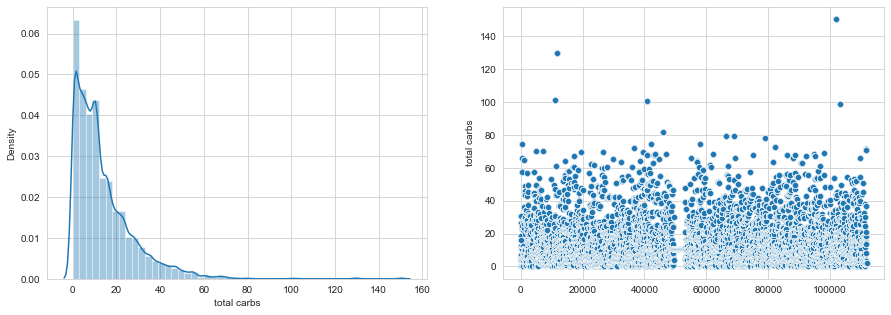

In [18]:
show_plot(df_describe_train['total carbs'])

In [19]:
df_describe_test = pd.DataFrame(values_test)
df_describe_test.describe()
df_describe_test = df_describe_test.rename(columns={0: "total carbs"})

C:\Users\Yulia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


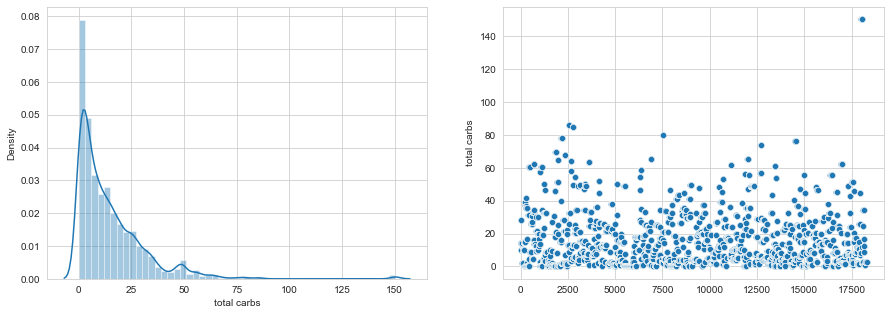

In [20]:
show_plot(df_describe_test['total carbs'])

____